In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

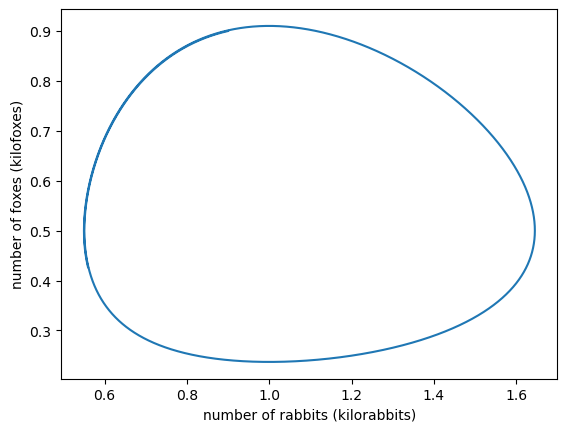

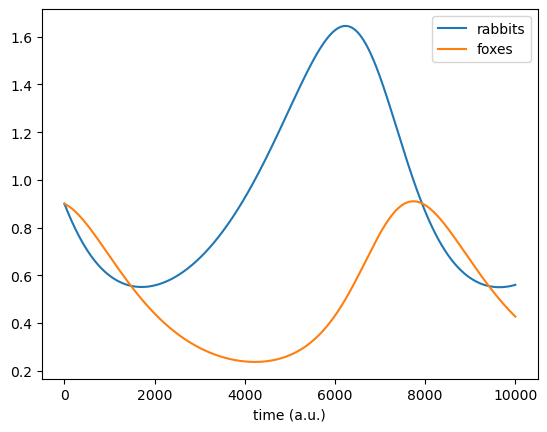

In [2]:
# exercise 0

# setting up constants
alpha=2/3
beta=4/3
gamma=delta=1

#setting up time parameters
npts=10000
tmax=10
dt=tmax/npts

# initialising the solution array:
y=np.zeros((npts, 2))

# the initial number of rabbits (in kilo-rabbit)
x0=0.9

# the initial number of foxes (in kilo-fox)
y0=0.9

y[0]=[x0,y0]

# loop over the integration points:
for i in range (0, npts-1):
    # compute growth rate from the equations
    G=np.array([alpha*y[i,0]-beta*y[i,0]*y[i,1],
               delta*y[i,0]*y[i,1]-gamma*y[i,1]])
    y[i+1]=y[i]+G*dt

# plotting
plt.plot(y[:,0], y[:,1])
plt.xlabel('number of rabbits (kilorabbits)')
plt.ylabel('number of foxes (kilofoxes)')
plt.show();

plt.plot(y[:,0], label='rabbits')
plt.plot(y[:,1], label='foxes')
plt.xlabel('time (a.u.)')
plt.legend()
plt.show();

In [3]:
# exercise 1

def orbit_solve(r0, v0, tmax, N, GM, method='euler'):
    '''
    solving the 2D orbit using euler method

    r0: initial position (x0, y0)
    v0: initial velocity (vx0, vy0)
    tmax: total time
    N: number of time steps
    GM: gravitational constant G * mass of central body
    '''
    
    # time step
    dt=tmax/N

    # arrays for time, position (x,y) and velocity (vx, vy)
    t=np.linspace(0, tmax, N)
    r=np.zeros((N, 2))
    v=np.zeros((N, 2))

    #initial conditions
    r[0]=r0
    v[0]=v0

    # euler integration 
    for i in range(0, N-1):
        
        # current position
        x=r[i, 0]
        y=r[i, 1]
        
        # distance from origin
        rr=np.sqrt(x**2+y**2)
        
        # acceleration from gravity a = -GM * r/r^3
        ax=-GM*(x/rr**3)
        ay=-GM*(y/rr**3)
        a=np.array([ax, ay])
        
        #euler updates
        r[i+1]=r[i]+v[i]*dt
        v[i+1]=v[i]+a*dt
    return t, r, v

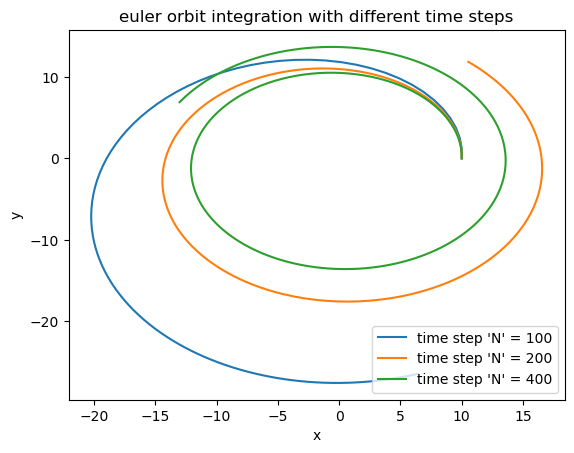

In [4]:
# exercise 2

# constants
G=1
M=1
GM=G*M

# radius of orbit
r_orb=10

#initial position
r0=np.array([r_orb, 0])

# orbit speed v=sqrt(GM/r)
v_orb=np.sqrt(GM/r_orb)

#initial velocity, perpendicular to r along +y
v0=np.array([0, v_orb])

# angular speed omega^2=GM/r^3
omega=np.sqrt(GM/r_orb**3)

# time period for one orbit T=2pi/omega
T=2*np.pi/omega

# we need to integrate for two periods
tmax=2*T

# solving for different times
t100, r100, v100=orbit_solve(r0, v0, tmax, 100, GM)
t200, r200, v200=orbit_solve(r0, v0, tmax, 200, GM)
t400, r400, v400=orbit_solve(r0, v0, tmax, 400, GM)

#plotting all motions in one figure
plt.plot(r100[:,0], r100[:,1], label="time step 'N' = 100")
plt.plot(r200[:,0], r200[:,1], label="time step 'N' = 200")
plt.plot(r400[:,0], r400[:,1], label="time step 'N' = 400")
plt.xlabel('x')
plt.ylabel('y')
plt.title('euler orbit integration with different time steps')
plt.legend()
plt.show();

In [5]:
# exercise 3

def orbit_solve2(r0, v0, tmax, N, GM, method='euler'):
    '''
    solving the 2D orbit using euler, euler cromer, or verlet methods

    r0: initial position (x0, y0)
    v0: initial velocity (vx0, vy0)
    tmax: total time
    N: number of time steps
    GM: gravitational constant G * mass of central body
    method: 'euler', 'euler-cromer', or 'verlet'
    '''
    
    # time step
    dt=tmax/N

    # arrays for time, position (x,y) and velocity (vx, vy)
    t=np.linspace(0, tmax, N)
    r=np.zeros((N, 2))
    v=np.zeros((N, 2))

    #initial conditions
    r[0]=r0
    v[0]=v0

    # integration loop
    for i in range(0, N-1):
        
        # current position
        x=r[i, 0]
        y=r[i, 1]
        
        # distance from origin
        rr=np.sqrt(x**2+y**2)
        
        # acceleration from gravity a = -GM * r/r^3
        ax=-GM*(x/rr**3)
        ay=-GM*(y/rr**3)
        a=np.array([ax, ay])

        #different methods
        if method == 'euler':
            #normal euler method from before
            r[i+1]=r[i]+v[i]*dt
            v[i+1]=v[i]+a*dt
        elif method == 'euler-cromer':
            #euler cromer: update v first then r
            v[i+1]=v[i]+a*dt
            r[i+1]=r[i]+v[i+1]*dt
        elif method == 'verlet':
            # update position
            r[i+1]=r[i]+v[i]*dt+0.5*a*dt**2
            # new acceleration at r[i+1]
            # need to get new everything, then acceleration
            x_new=r[i+1, 0]
            y_new=r[i+1, 1]
            rr_new=np.sqrt(x_new**2 + y_new**2)
            ax_new=-GM*(x_new/rr_new**3)
            ay_new=-GM*(y_new/rr_new**3)
            a_new=np.array([ax_new, ay_new])
            # now updating velocity using average acceleration
            v[i+1]=v[i]+0.5*(a+a_new)*dt
        else:
            print('unknown method. please use either euler, euler-cromer, or verlet.')
    return t, r, v

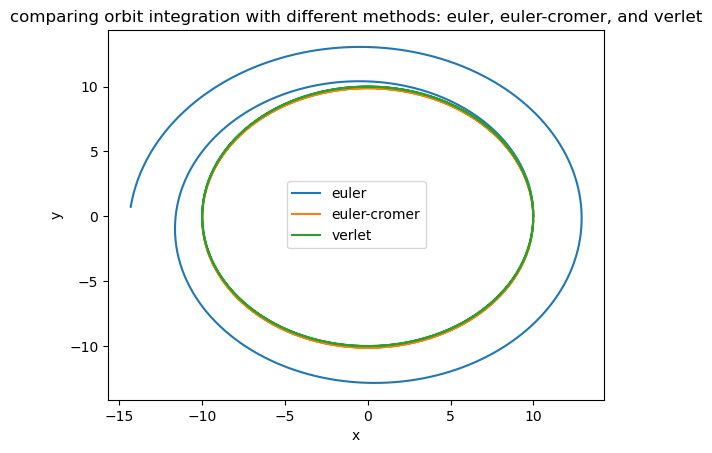

In [6]:
# exercise 4

# constants, same as before
G=1
M=1
GM=G*M

# radius of orbit
r_orb=10

#initial position
r0=np.array([r_orb, 0])

# orbit speed v=sqrt(GM/r)
v_orb=np.sqrt(GM/r_orb)

#initial velocity, perpendicular to r along +y
v0=np.array([0, v_orb])

# angular speed omega^2=GM/r^3
omega=np.sqrt(GM/r_orb**3)

# time period for one orbit T=2pi/omega
T=2*np.pi/omega

# choose a few orbits. here: two periods
tmax=2*T

# choose a number of time steps
N=500

#solving using diff methods
t_e, r_e, v_e=orbit_solve2(r0, v0, tmax, N, GM, method='euler')
t_ec, r_ec, v_ec=orbit_solve2(r0, v0, tmax, N, GM, method='euler-cromer')
t_v, r_v, v_v=orbit_solve2(r0, v0, tmax, N, GM, method='verlet')

#plotting all motions in one figure
plt.plot(r_e[:,0], r_e[:,1], label='euler')
plt.plot(r_ec[:,0], r_ec[:,1], label='euler-cromer')
plt.plot(r_v[:,0], r_v[:,1], label='verlet')
plt.xlabel('x')
plt.ylabel('y')
plt.title('comparing orbit integration with different methods: euler, euler-cromer, and verlet')
plt.legend()
plt.show();

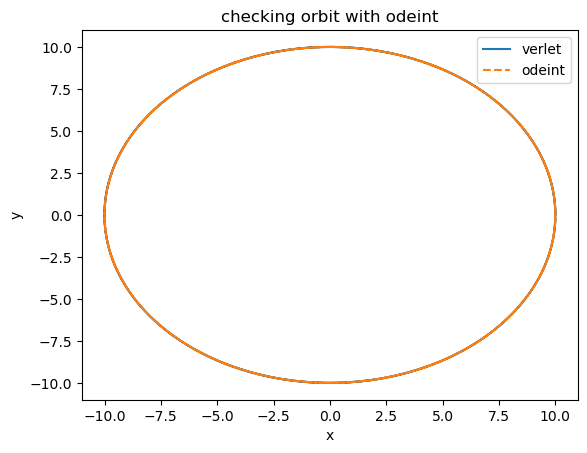

In [7]:
# exercise 5

# function for odeint: y=[x, y, vx, vy]
def ode_func(y, t, GM):
    x, yy, vx, vy=y
    r=np.sqrt(x**2 + yy**2)
    # acceleration from gravity
    ax= -GM * x/ r**3
    ay= -GM * yy/ r**3
    # return dx/dt, dy/dt, dvx/dt, and dvy/dt
    return [vx, vy, ax, ay]

# initial state for odeint (position and velocity together)
y0=[r0[0], r0[1], v0[0], v0[1]]

# time array for integration
t_ode=np.linspace(0, tmax, N)

# solving with odeint
sol=odeint(ode_func, y0, t_ode, args=(GM,))

#extract x and y positions
x_ode=sol[:,0]
y_ode=sol[:,1]

#plotting odeint result vs verlet
plt.plot(r_v[:,0], r_v[:,1], label='verlet')
plt.plot(x_ode, y_ode, '--', label='odeint')
plt.xlabel('x')
plt.ylabel('y')
plt.title('checking orbit with odeint')
plt.legend()
plt.show();

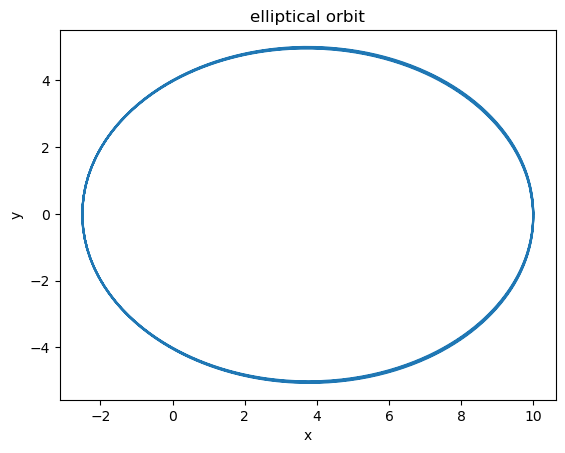

In [8]:
# exercise 6

# making an elliptical orbit by changing the speed

#constants
G=1
M=1
GM=G*M

# starting position
r_orb=10
r0=np.array([r_orb, 0])

#because F_G and F_c are equal, we can rearrange -GMm/r^2 r^hat = -mv^2/r r^hat
# to give v=sqrt(GM/r)
# with r=10 we get v=sqrt(0.1)=0.316, 
# so we need a v value smaller or larger to get an elliptical shape
v0=np.array([0,0.2])

#time period
# angular speed omega^2=GM/r^3
omega=np.sqrt(GM/r_orb**3)

# time period for one orbit T=2pi/omega
T=2*np.pi/omega

# choose a few orbits. here: two periods
tmax=2*T

# integrating using verlet
t_ell, r_ell, v_ell = orbit_solve2(r0, v0, tmax, 1000, GM, method='verlet') 
# choose N=1000 to make plot smooth

# plotting the orbit
plt.plot(r_ell[:,0], r_ell[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('elliptical orbit')
plt.show();
# looks the same tbh lol but idk how to fix? when i put 0.1 instead of 0.2 it spiralled

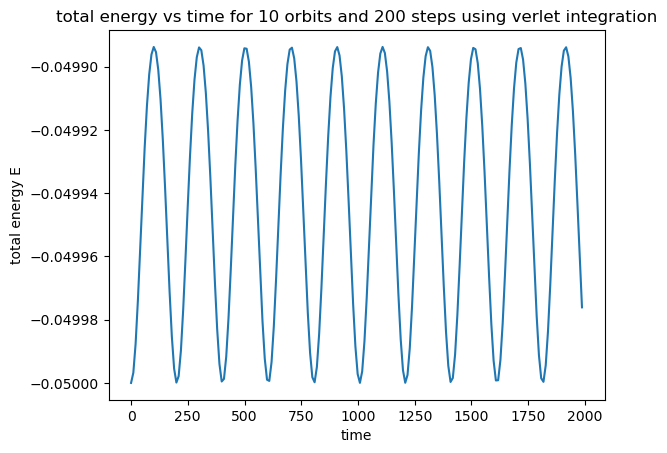

In [9]:
# exercise 7

#constants
G=1
M=1
GM=G*M
m=1 #mass of orbiting body

# circular orbit setup
r_orb=10
r0=np.array([r_orb, 0])

#circular speed, v=sqrt(GM/r)
v_orb=np.sqrt(GM/r_orb)
v0=np.array([0, v_orb])

# angular speed and period
omega= np.sqrt(GM/r_orb**3)
T=2*np.pi/omega

# 10 orbits and 200 points
tmax=10*T
N=200

# integrating using verlet
t, r, v =orbit_solve2(r0, v0, tmax, N, GM, method='verlet')

#calculating total energy E=T+V for each time step
# KE T=1/2mv^2
vx=v[:,0]
vy=v[:,1]
v2=vx**2 + vy**2
T_energy = 0.5 * m * v2

#potential energy V=-GMm/r
r_mag=np.sqrt(r[:,0]**2+r[:,1]**2)
V_energy=-GM*m/r_mag

E=T_energy+V_energy

#plottiing energy vs time
plt.plot(t, E)
plt.xlabel('time')
plt.ylabel('total energy E')
plt.title('total energy vs time for 10 orbits and 200 steps using verlet integration')
plt.show();